#### Author: Reda Mohsen
#### Description: Comparing Fully Connected Neural Network and Convolution Neural Network using MNIST dataset

## Install Dependencies

In [1]:
#!pip install scikit-learn tensorflow matplotlib seaborn numpy pandas

In [2]:
#!pip list

In [3]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

## Data

In [5]:
#!pip install tensorflow-datasets

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualize Examples

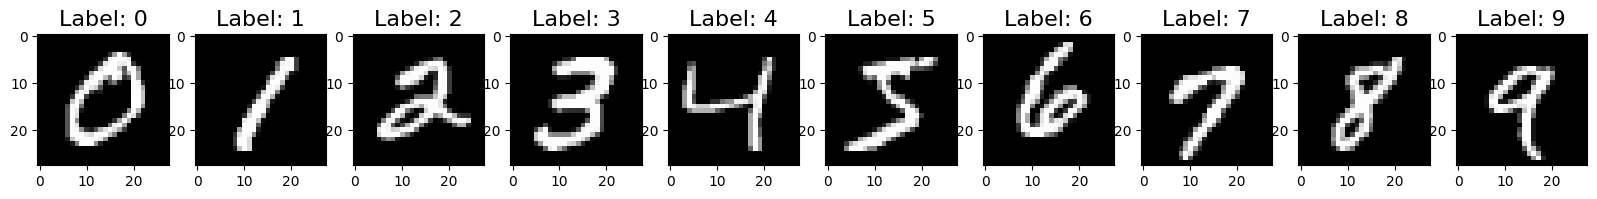

In [8]:
num_classes = 10
f, ax = plt.subplots(1,num_classes, figsize = (20, 20))

for i in range (0 , num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [9]:
for i in range(num_classes):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [10]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
for i in range(num_classes):
    print(y_train[i])
    
ytrain=y_train
ytest=y_test

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Prepare Data

In [11]:
# Normalize Data
x_train = x_train/255.0
x_test = x_test/255.0

xtrain=x_train
xtest=x_test

# Reshape Data
x_train = x_train.reshape(x_train.shape[0] ,-1)
x_test = x_test.reshape(x_test.shape[0] ,-1)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


## Create Model - Fully Connected Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))

model.add(Dense(units=128, activation='relu' ))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax' ))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [13]:
import time
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.now= time.time()
    def on_train_end(self,totaltime, logs=None):
        later=time.time()
        duration=later-self.now 
        totaltime = duration
        print('Total Time is: ', totaltime, ' seconds')

In [14]:
batch_size = 512 #import 512 images in the network at a single time
epochs = 10
model.fit(x=x_train,y=y_train, batch_size=batch_size, epochs=epochs, callbacks=[CustomCallback()])

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.6010 - accuracy: 0.8268
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2213 - accuracy: 0.9357
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1627 - accuracy: 0.9530
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1293 - accuracy: 0.9619
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1056 - accuracy: 0.9689
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0905 - accuracy: 0.9731
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0792 - accuracy: 0.9762
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.9792
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0601 - accuracy: 0.9815
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0530 - accuracy: 0.9840

In [15]:
fctime = round(6.69156289100647)/100
print(fctime)

0.07


## Evaluate

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9757
Test Loss: 0.07658623903989792, Test Accuracy: 0.9757000207901001


## Test

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[7.26771674e-08 8.02735144e-07 1.28127504e-05 ... 9.99956250e-01
  1.15930071e-07 4.22483390e-06]
 [3.19140071e-07 1.48938474e-04 9.99748409e-01 ... 2.08786020e-07
  1.61730861e-06 1.61122740e-10]
 [8.90095998e-06 9.96545255e-01 6.02935150e-04 ... 1.22901204e-03
  5.12772531e-04 7.67407691e-05]
 ...
 [4.36988945e-10 1.27631647e-08 4.47813675e-10 ... 9.70754263e-06
  3.24765574e-06 1.36310355e-05]
 [7.33268735e-08 9.18568048e-08 8.88473628e-10 ... 7.92696483e-07
  4.93158295e-05 9.55758761e-09]
 [2.39149092e-08 1.94700506e-10 1.31581745e-10 ... 7.95887770e-13
  1.31898414e-09 3.10802816e-12]]
[7 2 1 ... 4 5 6]


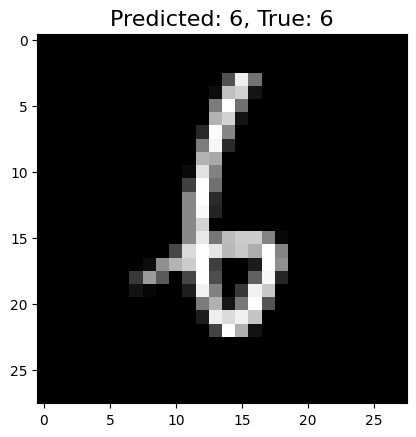

In [18]:
# Single Example
random_idx = np.random.choice(len(x_test))

x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

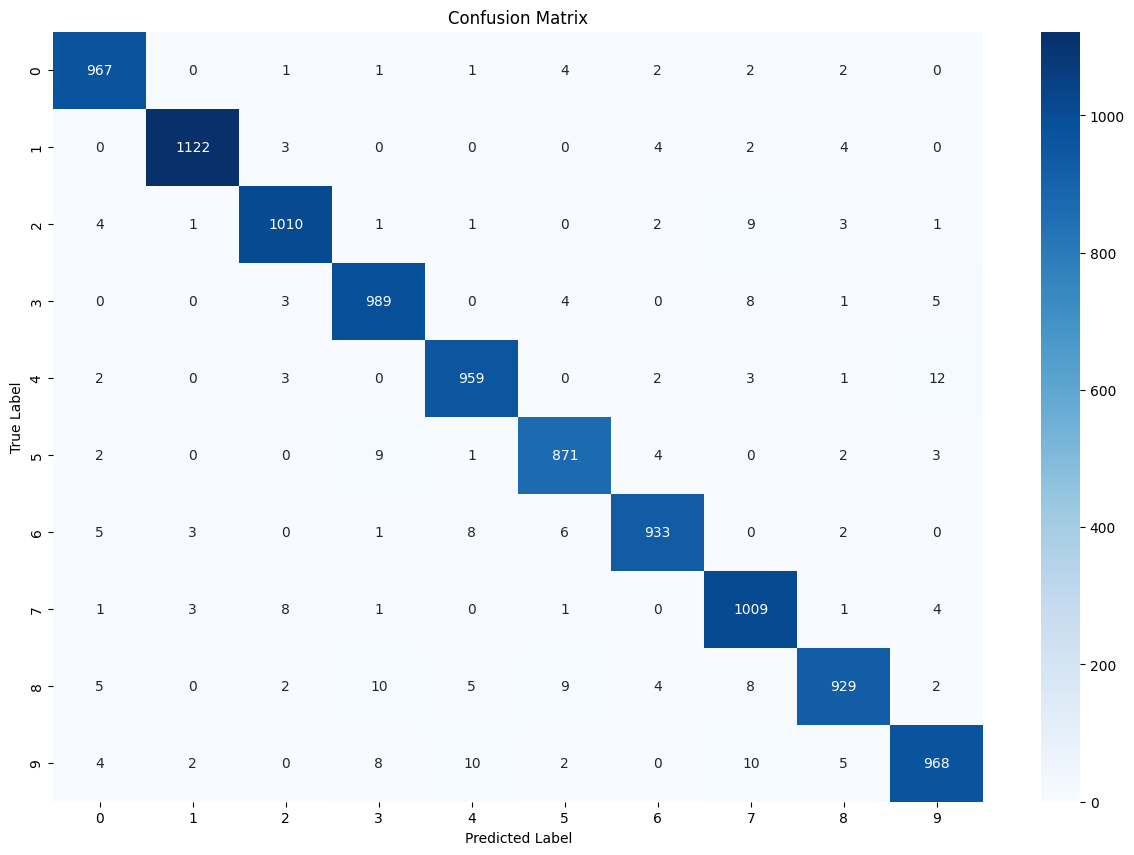

In [19]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Save the Model

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model.save(os.path.join('models','mnistdigit.h5'))

In [22]:
new_model = load_model('.\models\mnistdigit.h5')

In [23]:
y_pred_new = new_model.predict(x_test)
y_pred_classes_new = np.argmax(y_pred_new, axis=1)
print(y_pred_new)
print(y_pred_classes_new)

313/313 [==============================] - 0s 1ms/step
[[7.26771674e-08 8.02735144e-07 1.28127504e-05 ... 9.99956250e-01
  1.15930071e-07 4.22483390e-06]
 [3.19140071e-07 1.48938474e-04 9.99748409e-01 ... 2.08786020e-07
  1.61730861e-06 1.61122740e-10]
 [8.90095998e-06 9.96545255e-01 6.02935150e-04 ... 1.22901204e-03
  5.12772531e-04 7.67407691e-05]
 ...
 [4.36988945e-10 1.27631647e-08 4.47813675e-10 ... 9.70754263e-06
  3.24765574e-06 1.36310355e-05]
 [7.33268735e-08 9.18568048e-08 8.88473628e-10 ... 7.92696483e-07
  4.93158295e-05 9.55758761e-09]
 [2.39149092e-08 1.94700506e-10 1.31581745e-10 ... 7.95887770e-13
  1.31898414e-09 3.10802816e-12]]
[7 2 1 ... 4 5 6]


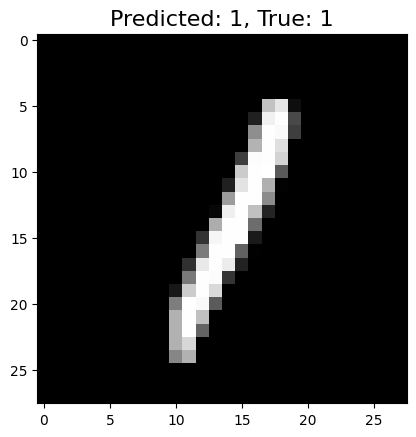

In [24]:
# Single Example
random_idx = np.random.choice(len(x_test))

x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

## Create Model - Convolutional Neural Network

In [25]:
# print x before reshape
print(xtrain.shape, xtest.shape)
# Reshape Data
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape, xtest.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### Build Model

In [26]:
# Lenet-5 CNN Architecture
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

cnn_model = Sequential()
# Layer 1
cnn_model.add(Conv2D(filters = 6, input_shape=(28,28,1), kernel_size=5, padding='same', strides=1, activation='tanh'))
# Layer 2
cnn_model.add(MaxPool2D(strides=2))
# Layer 3
cnn_model.add(Conv2D(filters=16 ,kernel_size=5, padding='valid', strides=1, activation='tanh'))
# Layer 4
cnn_model.add(MaxPool2D(strides=2))
# Layer 5
cnn_model.add(Conv2D(filters=120,kernel_size=5,strides=1,padding='valid', activation='tanh'))
# Flatten
cnn_model.add(Flatten())
# Layer 6
cnn_model.add(Dense(256, activation='tanh'))
# Layer 7
cnn_model.add(Dense(84, activation='tanh'))
# Output Layer
cnn_model.add(Dense(10, activation='softmax'))

In [27]:
cnn_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### Train Model

In [29]:
batch_size = 512 #import 512 images in the network at a single time
epochs = 10
cnn_model.fit(xtrain,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[CustomCallback()])

Epoch 1/10
118/118 [==============================] - 7s 56ms/step - loss: 0.1819 - accuracy: 0.7044
Epoch 2/10
118/118 [==============================] - 7s 58ms/step - loss: 0.0366 - accuracy: 0.9589
Epoch 3/10
118/118 [==============================] - 7s 60ms/step - loss: 0.0202 - accuracy: 0.9749
Epoch 4/10
118/118 [==============================] - 7s 59ms/step - loss: 0.0147 - accuracy: 0.9803
Epoch 5/10
118/118 [==============================] - 7s 59ms/step - loss: 0.0116 - accuracy: 0.9846
Epoch 6/10
118/118 [==============================] - 7s 58ms/step - loss: 0.0097 - accuracy: 0.9870
Epoch 7/10
118/118 [==============================] - 7s 58ms/step - loss: 0.0081 - accuracy: 0.9889
Epoch 8/10
118/118 [==============================] - 7s 63ms/step - loss: 0.0067 - accuracy: 0.9911
Epoch 9/10
118/118 [==============================] - 7s 60ms/step - loss: 0.0061 - accuracy: 0.9916
Epoch 10/10
118/118 [==============================] - 7s 60ms/step - loss: 0.0051 - accura

In [30]:
cnntime=round(70.65616035461426)/100
print(cnntime)

0.71


### In Lenet-5 CNN: Total Time is:  70.70262026786804  seconds

### Evaluate Performance

In [31]:
testloss, testacc = cnn_model.evaluate(xtest, ytest)
print ("Test Loss: {}, Test Accuracy: {}".format(testloss, testacc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0073 - accuracy: 0.9889
Test Loss: 0.007282026577740908, Test Accuracy: 0.9889000058174133


### Test

In [32]:
ypred = cnn_model.predict(xtest)
ypred_classes = np.argmax(ypred, axis=1)
print(ypred)
print(ypred_classes)

313/313 [==============================] - 1s 3ms/step
[[1.9100828e-07 8.2481313e-07 6.9135126e-07 ... 9.9999249e-01
  5.9200875e-07 1.1348907e-06]
 [2.3962887e-06 7.6088452e-07 9.9999046e-01 ... 4.8320737e-07
  1.7555415e-06 1.3260795e-07]
 [1.0133430e-07 9.9999654e-01 3.5927022e-07 ... 2.8116787e-07
  2.8498508e-07 3.4211192e-07]
 ...
 [2.2033396e-07 9.9576289e-07 5.4307731e-07 ... 6.6995511e-07
  1.0256057e-06 1.0415251e-06]
 [4.5830943e-06 1.8052676e-06 1.6715792e-07 ... 6.6651802e-07
  7.7118544e-05 7.6878632e-07]
 [6.4529780e-07 2.2202344e-07 6.5563103e-07 ... 1.8146967e-07
  4.9306374e-07 2.5991852e-07]]
[7 2 1 ... 4 5 6]


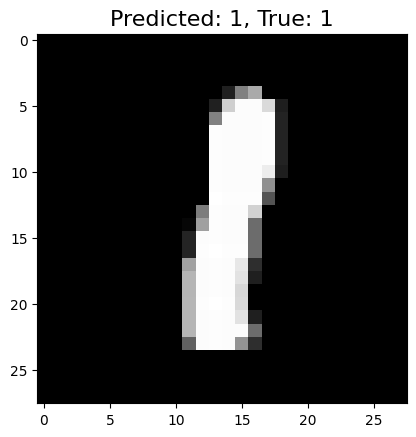

In [33]:
# Single Example
random_idx3 = np.random.choice(len(xtest))

xsample = x_test[random_idx3]
ytrue = np.argmax(ytest, axis=1)
ysample_true = y_true[random_idx3]
ysample_pred_class = ypred_classes[random_idx3]

plt.title("Predicted: {}, True: {}".format(ysample_pred_class, ysample_true), fontsize=16)
plt.imshow(xsample.reshape(28,28), cmap='gray')

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

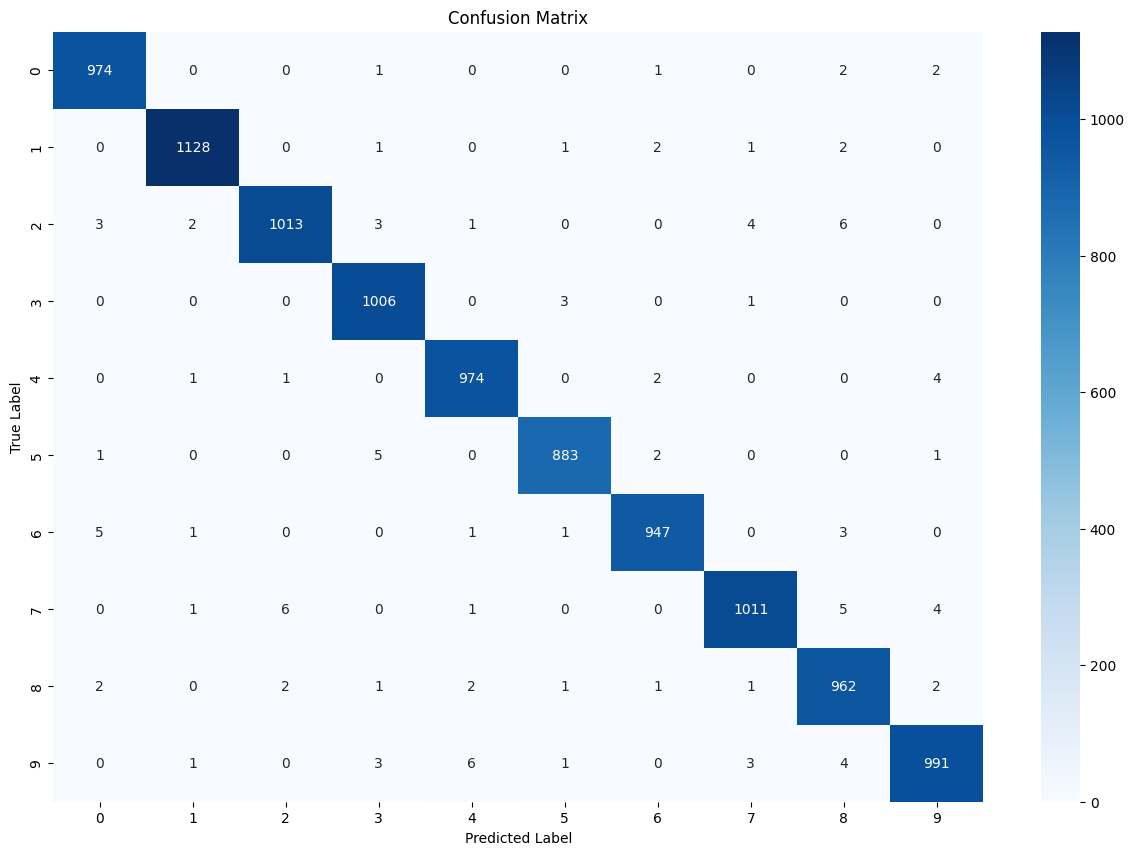

In [34]:
conf_matrix2 = confusion_matrix(ytrue, ypred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_matrix2, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

### Save the Model

In [35]:
cnn_model.save(os.path.join('models','mnistdigit_cnn.h5'))

# Compare

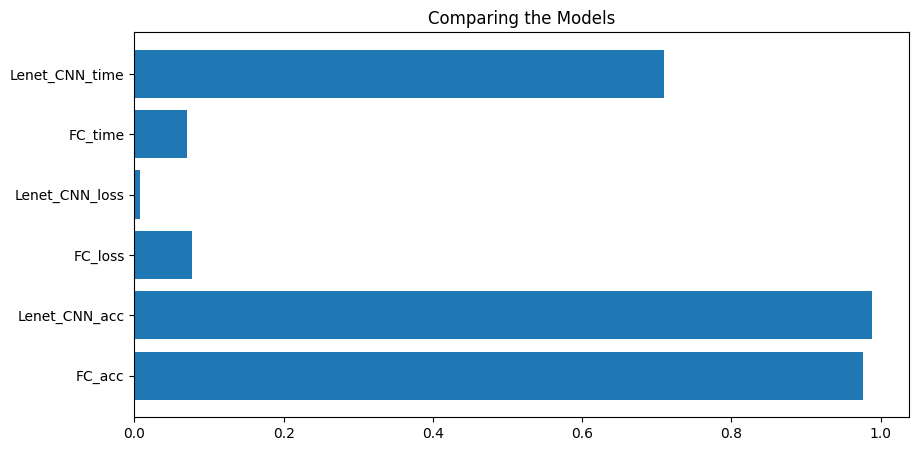

In [36]:
x = ["FC_acc",  "Lenet_CNN_acc", "FC_loss", "Lenet_CNN_loss","FC_time", "Lenet_CNN_time"]
y = [test_acc, testacc, test_loss, testloss,fctime, cnntime]

# setting figure size by using figure() function
plt.figure(figsize = (10,5))
     
# making the bar chart on the data
plt.barh(x, y)

# giving title to the plot
plt.title("Comparing the Models")
       
# visualizing the plot
plt.show()

### We can see the Lenet-5 CNN model is more accurate than the simple fully connected model, But the fully connected model trained faster than the cnn model.